<a href="https://colab.research.google.com/github/ayush-09/NLP-Task/blob/master/Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis:<br>
<p> Sentiment Analysis uses NLP to determine whether text is positive or negative.
</p>
According to the text it totally based on the mood of each segment.<br>
I assign a particular value to all unique mood.<br>
<U>If the value less than 3 then the sentiment is negative else positive. </U>


<TABLE>
<TR>
<TD><B>Mood</B></TD>
<TD><B>Sentiment</B></TD>
<TD><B>Value</B></TD>
</TR>
<TR>
<TD>Sadness</TD>
<TD>Negative</TD>
<TD>0</TD>
</TR>
<TR>
<TD>Anger</TD>
<TD>Negative</TD>
<TD>1</TD>
</TR>
<TR>
<TD>Fear</TD>
<TD>Negative</TD>
<TD>2</TD>
</TR><TR>
<TD>Love</TD>
<TD>Positive</TD>
<TD>3</TD>
</TR><TR>
<TD>Joy</TD>
<TD>Positive</TD>
<TD>4</TD>
</TR><TR>
<TD>Surprise</TD>
<TD>Positive</TD>
<TD>5</TD>
</TR>
</TABLE>



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Convert the dataset into .csv for training the model

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Sentiment DataSet/train.txt",delimiter=';',header=None)
data.columns = ['text','mood']
data.to_csv("/content/drive/MyDrive/Sentiment DataSet/train.csv",index=None)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Sentiment DataSet/test.txt",delimiter=';',header=None)
data.columns = ['text','mood']
data.to_csv("/content/drive/MyDrive/Sentiment DataSet/test.csv",index=None)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Sentiment DataSet/val.txt",delimiter=';',header=None)
data.columns = ['text','mood']
data.to_csv("/content/drive/MyDrive/Sentiment DataSet/val.csv",index=None)

## Data Preprocessing

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Sentiment DataSet/train.csv") 

In [ ]:
train_data.head()

,text,mood
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   mood    16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [ ]:
train_data.shape

(16000, 2)

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Sentiment DataSet/test.csv")

In [ ]:
test_data.head()

,text,mood
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
val_data = pd.read_csv("/content/drive/MyDrive/Sentiment DataSet/val.csv")

In [ ]:
val_data.head()

,text,mood
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


### Assign Values for Sentiment Analysis

In [ ]:
train_data['mood'].unique()
dic = {'sadness':0,'anger':1,'fear':2,'love':3,'joy':4,'surprise':5}

In [ ]:
train_data['mood'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: mood, dtype: int64

In [ ]:
train_data['Sentiment'] = train_data['mood'].map(dic)

In [ ]:
gdic = {0:'Negative',1:'Negative',2:'Negative',3:'Positive',4:'Positive',5:'Positive'}

In [ ]:
train_data['General_Sentiment']= train_data['Sentiment'].map(gdic)

In [ ]:
train_data.head()

,text,mood,Sentiment,General_Sentiment
0,i didnt feel humiliated,sadness,0,Negative
1,i can go from feeling so hopeless to so damned...,sadness,0,Negative
2,im grabbing a minute to post i feel greedy wrong,anger,1,Negative
3,i am ever feeling nostalgic about the fireplac...,love,3,Positive
4,i am feeling grouchy,anger,1,Negative


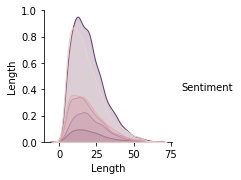

In [ ]:
train_data['Length'] = train_data['text'].apply(lambda x: len(str(x).split(' ')))
import seaborn as sns
sns.pairplot(train_data,hue='Sentiment',vars=['Length'])

In [ ]:
from tqdm import tqdm
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Clean the text

In [ ]:
c=0
def clean_sentences(df):
    global c
    count=[]
    selected_text = []
    for sent in tqdm(df['text']):
        # removing non-alphabetical characters 
        text = re.sub("[^a-zA-Z]"," ",sent)
        
        
        # Now tokenizing the sentence : 
        word = word_tokenize(text)
        words = [i.lower() for i in word]

        
        #removing stop words :
        new_words = [ ele for ele in words if ele.lower() not in stopwords.words('english') ]
        
        # Lemmatizing each word to its lemma
        lem = WordNetLemmatizer()
        lem_words = [lem.lemmatize(i) for i in new_words]
        
        #finally
        selected_text.append(lem_words)
        c+=1
        count.append(c)
        
    return(selected_text,count)

In [ ]:
train_data['text'][0]

'i didnt feel humiliated'

In [ ]:
train_sen,train_count = clean_sentences(train_data)
test_sen,test_count = clean_sentences(test_data)
val_sen,val_count = clean_sentences(val_data)

100%|██████████| 2000/2000 [00:05<00:00, 373.72it/s]


In [ ]:
train_data['selected_text'] = train_sen
test_data['selected_text'] = test_sen
val_data['selected_text'] = val_sen

In [ ]:
train_data['textID']= train_count
train_data.set_index(train_data['textID'],inplace=True)
train_data.drop(train_data.columns[-1], axis=1, inplace=True)

In [ ]:
test_data['textID']= test_count
test_data.set_index(test_data['textID'],inplace=True)
test_data.drop(test_data.columns[-1], axis=1, inplace=True)

In [ ]:
val_data['textID']= val_count
val_data.set_index(val_data['textID'],inplace=True)
val_data.drop(val_data.columns[-1], axis=1, inplace=True)

In [ ]:
train_data.head()

,text,mood,Sentiment,General_Sentiment,selected_text
textID,,,,,
1,i didnt feel humiliated,sadness,0,Negative,"[didnt, feel, humiliated]"
2,i can go from feeling so hopeless to so damned...,sadness,0,Negative,"[go, feeling, hopeless, damned, hopeful, aroun..."
3,im grabbing a minute to post i feel greedy wrong,anger,1,Negative,"[im, grabbing, minute, post, feel, greedy, wrong]"
4,i am ever feeling nostalgic about the fireplac...,love,3,Positive,"[ever, feeling, nostalgic, fireplace, know, st..."
5,i am feeling grouchy,anger,1,Negative,"[feeling, grouchy]"


In [ ]:
test_data.head()

,text,mood,selected_text
textID,,,
16001,im feeling rather rotten so im not very ambiti...,sadness,"[im, feeling, rather, rotten, im, ambitious, r..."
16002,im updating my blog because i feel shitty,sadness,"[im, updating, blog, feel, shitty]"
16003,i never make her separate from me because i do...,sadness,"[never, make, separate, ever, want, feel, like..."
16004,i left with my bouquet of red and yellow tulip...,joy,"[left, bouquet, red, yellow, tulip, arm, feeli..."
16005,i was feeling a little vain when i did this one,sadness,"[feeling, little, vain, one]"


In [ ]:
val_data.head()

,text,mood,selected_text
textID,,,
18001,im feeling quite sad and sorry for myself but ...,sadness,"[im, feeling, quite, sad, sorry, ill, snap, soon]"
18002,i feel like i am still looking at a blank canv...,sadness,"[feel, like, still, looking, blank, canvas, bl..."
18003,i feel like a faithful servant,love,"[feel, like, faithful, servant]"
18004,i am just feeling cranky and blue,anger,"[feeling, cranky, blue]"
18005,i can have for a treat or if i am feeling festive,joy,"[treat, feeling, festive]"


In [ ]:
(" ").join(train_sen[0])

'didnt feel humiliated'

## Saving the data According to submission

In [ ]:
# Train Data
data=pd.DataFrame(train_data)
data.to_csv('train.csv', index=False)

In [ ]:
data.head()

,text,mood,Sentiment,General_Sentiment,selected_text
textID,,,,,
1,i didnt feel humiliated,sadness,0,Negative,"[didnt, feel, humiliated]"
2,i can go from feeling so hopeless to so damned...,sadness,0,Negative,"[go, feeling, hopeless, damned, hopeful, aroun..."
3,im grabbing a minute to post i feel greedy wrong,anger,1,Negative,"[im, grabbing, minute, post, feel, greedy, wrong]"
4,i am ever feeling nostalgic about the fireplac...,love,3,Positive,"[ever, feeling, nostalgic, fireplace, know, st..."
5,i am feeling grouchy,anger,1,Negative,"[feeling, grouchy]"


In [ ]:
# Test Data
data=pd.DataFrame(test_data)
data.to_csv('test.csv', index=False)

In [ ]:
data.head()

,text,mood,selected_text
textID,,,
16001,im feeling rather rotten so im not very ambiti...,sadness,"[im, feeling, rather, rotten, im, ambitious, r..."
16002,im updating my blog because i feel shitty,sadness,"[im, updating, blog, feel, shitty]"
16003,i never make her separate from me because i do...,sadness,"[never, make, separate, ever, want, feel, like..."
16004,i left with my bouquet of red and yellow tulip...,joy,"[left, bouquet, red, yellow, tulip, arm, feeli..."
16005,i was feeling a little vain when i did this one,sadness,"[feeling, little, vain, one]"


In [ ]:
# Validation Data
data=pd.DataFrame(val_data)
data.to_csv('val.csv', index=False)

In [ ]:
data.head()

,text,mood,selected_text
textID,,,
18001,im feeling quite sad and sorry for myself but ...,sadness,"[im, feeling, quite, sad, sorry, ill, snap, soon]"
18002,i feel like i am still looking at a blank canv...,sadness,"[feel, like, still, looking, blank, canvas, bl..."
18003,i feel like a faithful servant,love,"[feel, like, faithful, servant]"
18004,i am just feeling cranky and blue,anger,"[feeling, cranky, blue]"
18005,i can have for a treat or if i am feeling festive,joy,"[treat, feeling, festive]"


### Converting into Numpy Array

In [ ]:
from tensorflow.keras.utils import to_categorical
y_target = to_categorical(train_data['Sentiment'].values)

In [ ]:
train_data['Sentiment'].value_counts()

4    5362
0    4666
1    2159
2    1937
3    1304
5     572
Name: Sentiment, dtype: int64

In [ ]:
y_target

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_target.shape

(16000, 6)

### Graph Plotting

In [ ]:
import matplotlib.pyplot as plt

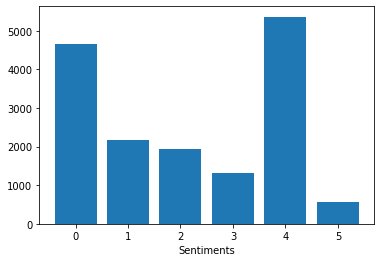

In [ ]:
val_array = train_data['Sentiment'].value_counts().to_xarray()
plt.bar(val_array.index, val_array)
plt.xlabel('Sentiments')
plt.show()

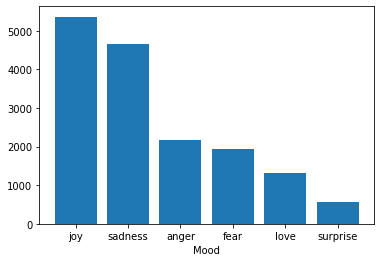

In [ ]:
val_array = train_data['mood'].value_counts().to_xarray()
plt.bar(val_array.index, val_array)
plt.xlabel('Mood')
plt.show()

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(train_sen,y_target,test_size = 0.2,stratify = y_target)

In [ ]:
X_train[0]

['feel', 'deprived', 'calorie', 'day']

In [ ]:
unique_words = set()
len_max = -1

for sent in tqdm(X_train):
    unique_words.update(sent)
    if(len_max < len(sent)):
        len_max = len(sent)

print('Words in vocab : ' , len(list(unique_words)))
print('Max_length : ' , len_max)

100%|██████████| 12800/12800 [00:00<00:00, 282113.74it/s]

Words in vocab :  11987
Max_length :  35


## Out-Of-Vocabulary(OOV)

In [ ]:
vocab_size = len(list(unique_words))
embedding_dim = 300
max_length = len_max
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size,
                      # filters = '#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      oov_token = oov_tok,
                      # lower = True,
                      char_level = False)

tokenizer.fit_on_texts(list(X_train))

# Training
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train,
                        maxlen = max_length,
                        padding = padding_type,
                        truncating = trunc_type)

# Validation
X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val,
                      maxlen = max_length,
                      padding = padding_type,
                      truncating = trunc_type)

# Testing
X_test = tokenizer.texts_to_sequences(test_sen)
X_test = pad_sequences(X_test,
                       maxlen = max_length,
                       padding = padding_type,
                       truncating = trunc_type)

In [ ]:
print("X_training shape   : ",X_train.shape)
print("X_validation shape : ",X_val.shape)
print("X_testing shape    : ",X_test.shape)

X_training shape   :  (12800, 35)
X_validation shape :  (3200, 35)
X_testing shape    :  (2000, 35)


### Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Bidirectional,LSTM,Activation,Conv1D,MaxPool1D,Dropout
from keras.layers.embeddings import Embedding

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_length = max_length))
model.add(Bidirectional(LSTM(128,dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2, return_sequences=False)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(y_target.shape[1],activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 300)           3596100   
_________________________________________________________________
bidirectional (Bidirectional (None, 35, 256)           439296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 4,217,034
Trainable params: 4,217,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(min_delta = 0.001,
                               mode = 'max',
                               monitor = 'accuracy',
                               patience = 2)
callback = [early_stopping]

In [ ]:
num_epochs = 4

history = model.fit(X_train,y_train,
                    epochs = num_epochs,
                    batch_size = 256,
                    verbose = 1,
                    callbacks = callback)

Epoch 1/4
50/50 [==============================] - 109s 2s/step - loss: 1.5526 - accuracy: 0.3773
Epoch 2/4
50/50 [==============================] - 100s 2s/step - loss: 0.7342 - accuracy: 0.7343
Epoch 3/4
50/50 [==============================] - 101s 2s/step - loss: 0.2928 - accuracy: 0.8980
Epoch 4/4
50/50 [==============================] - 100s 2s/step - loss: 0.1344 - accuracy: 0.9573


## Model Prediction(Output)

In [ ]:
y_pred = np.argmax(model.predict(X_test),axis=-1)

In [ ]:
y_pred

array([0, 0, 0, ..., 4, 4, 3])

In [ ]:
submission_df = pd.DataFrame({'text': test_data['text'], 'mood': test_data['mood'],'Sentiment': y_pred})

In [ ]:
submission_df['Sentiment']= submission_df['Sentiment'].map(gdic)
submission_df.to_csv('submission.csv', index=False)
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 16001 to 18000
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2000 non-null   object
 1   mood       2000 non-null   object
 2   Sentiment  2000 non-null   object
dtypes: object(3)
memory usage: 62.5+ KB


In [ ]:
submission_df.head(20)

,text,mood,Sentiment
textID,,,
16001,im feeling rather rotten so im not very ambiti...,sadness,Negative
16002,im updating my blog because i feel shitty,sadness,Negative
16003,i never make her separate from me because i do...,sadness,Negative
16004,i left with my bouquet of red and yellow tulip...,joy,Positive
16005,i was feeling a little vain when i did this one,sadness,Negative
16006,i cant walk into a shop anywhere where i do no...,fear,Negative
16007,i felt anger when at the end of a telephone call,anger,Negative
16008,i explain why i clung to a relationship with a...,joy,Positive
16009,i like to have the same breathless feeling as ...,joy,Positive


### Saving The Model

In [ ]:
model_json = model.to_json()

In [ ]:
import pickle
with open('saved_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import joblib
with open("saved_model.json", "w") as json_file:
    json_file.write(model_json)